In [1]:
import itertools
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import MeanShift

In [2]:
data = pd.read_csv('../data/processed/processed_weighted.csv')

In [3]:
data_rows = len(data)
scores = []
bandwidths = np.arange(0.40, 0.70, 0.01)


for bandwidth in bandwidths: 
    ms = MeanShift(bandwidth=bandwidth)
    prediction = ms.fit_predict(X=data)
    n_clusters = len(np.unique(prediction))
    
    if n_clusters != 1 and n_clusters != data_rows:
        sc = silhouette_score(data, prediction)
        db = davies_bouldin_score(data, prediction)
        ch = calinski_harabasz_score(data, prediction)
        scores.append((bandwidth, sc, db, ch, prediction,n_clusters))

In [4]:
tested_bandwidths, scs, dbs, chs, predictions, n_clusters = zip(*scores)
placings_per_alt = {}

for i in range(len(scores)):
    placings_per_alt[tested_bandwidths[i]] = {
        'bandwidth':tested_bandwidths[i],
        'silhouette coefficient': scs[i],
        'davies-bouldin index': dbs[i],
        'calinski-harabasz index': chs[i],
        'prediction': predictions[i],
        'clusters': n_clusters[i]
    }

sorted_by_max_sc = sorted(scores, key=lambda score: score[1], reverse=True)
sorted_by_min_db = sorted(scores, key=lambda score: score[2], reverse=False)
sorted_by_max_ch = sorted(scores, key=lambda score: score[3], reverse=True)

for index, score in enumerate(sorted_by_max_sc):
    placings_per_alt[score[0]]['max_sc'] = index

for index, score in enumerate(sorted_by_min_db):
    placings_per_alt[score[0]]['min_db'] = index

for index, score in enumerate(sorted_by_max_ch):
    placings_per_alt[score[0]]['max_ch'] = index

In [5]:
def overall_placing(score):
    alt = placings_per_alt[score[0]]
    return (alt['max_sc'] + alt['min_db'] + alt['max_ch']+3) / 3

sorted_scores_on_overall = sorted(scores, key=overall_placing, reverse=False)

for index, score in enumerate(sorted_scores_on_overall):
    placings_per_alt[score[0]]['overall'] = index


models = sorted(placings_per_alt.values(), key=lambda alt: alt['overall'], reverse=False)
models_in_tuples = [model.values() for model in models]


In [6]:
sorted_bandwidths, sorted_scs, sorted_dbs, sorted_chs, sorted_predictions, sorted_clusters, sorted_placing_sc, sorted_placing_db, sorted_placing_ch, sorted_overall = zip(*models_in_tuples)

In [7]:
def points_in_clusters(distribution):
    amount_of_points_in_cluster = {}
    for cluster_id in distribution:
        if cluster_id in amount_of_points_in_cluster:
            amount_of_points_in_cluster[cluster_id] += 1
        else:
            amount_of_points_in_cluster[cluster_id] = 1
    points_in_cluster_descending = sorted(list(amount_of_points_in_cluster.values()), reverse=True)
    return tuple(points_in_cluster_descending)

In [8]:
def print_info(i):
    print(
        f'{sorted_overall[i]:>2}. '
        f'Bandwidth: {sorted_bandwidths[i]:.2f}. '
        f'Scores: SC={sorted_scs[i]: 5.2f}, DB={sorted_dbs[i]: 5.2f}, CH={sorted_chs[i]: 7.2f}. '
        f'Clusters: {sorted_clusters[i]:>3}. Distribution: {str(points_in_clusters(sorted_predictions[i]))[:20]:<20}'
    )

In [9]:
top_amount = min(30,len(scores))

for i in range(top_amount):
    print_info(i)

 0. Bandwidth: 0.40. Scores: SC= 0.13, DB= 0.63, CH=  20.05. Clusters:  75. Distribution: (20, 16, 13, 12, 11,
 1. Bandwidth: 0.43. Scores: SC= 0.14, DB= 0.66, CH=  18.45. Clusters:  62. Distribution: (26, 26, 22, 14, 13,
 2. Bandwidth: 0.44. Scores: SC= 0.14, DB= 0.69, CH=  18.23. Clusters:  55. Distribution: (32, 28, 28, 15, 14,
 3. Bandwidth: 0.41. Scores: SC= 0.12, DB= 0.65, CH=  18.37. Clusters:  70. Distribution: (24, 19, 18, 14, 13,
 4. Bandwidth: 0.42. Scores: SC= 0.13, DB= 0.65, CH=  18.02. Clusters:  68. Distribution: (26, 21, 19, 17, 12,
 5. Bandwidth: 0.45. Scores: SC= 0.13, DB= 0.71, CH=  17.96. Clusters:  55. Distribution: (32, 27, 24, 24, 14,
 6. Bandwidth: 0.48. Scores: SC= 0.13, DB= 0.67, CH=  17.21. Clusters:  48. Distribution: (38, 37, 27, 19, 10,
 7. Bandwidth: 0.67. Scores: SC= 0.14, DB= 0.97, CH=  18.50. Clusters:  13. Distribution: (95, 80, 11, 9, 3, 3
 8. Bandwidth: 0.46. Scores: SC= 0.12, DB= 0.73, CH=  17.79. Clusters:  54. Distribution: (31, 28, 25, 19, 16,
 

In [10]:
def is_trivial(i):
    return (
        sorted_clusters[i] >= 208
        or points_in_clusters(sorted_predictions[i])[0] >= 208
        or len(points_in_clusters(sorted_predictions[i])) >= 100
    )

top_no_trivial = [i for i in range(len(sorted_overall)) if not is_trivial(i)][:top_amount]

for i in top_no_trivial:
    print_info(i)


 0. Bandwidth: 0.40. Scores: SC= 0.13, DB= 0.63, CH=  20.05. Clusters:  75. Distribution: (20, 16, 13, 12, 11,
 1. Bandwidth: 0.43. Scores: SC= 0.14, DB= 0.66, CH=  18.45. Clusters:  62. Distribution: (26, 26, 22, 14, 13,
 2. Bandwidth: 0.44. Scores: SC= 0.14, DB= 0.69, CH=  18.23. Clusters:  55. Distribution: (32, 28, 28, 15, 14,
 3. Bandwidth: 0.41. Scores: SC= 0.12, DB= 0.65, CH=  18.37. Clusters:  70. Distribution: (24, 19, 18, 14, 13,
 4. Bandwidth: 0.42. Scores: SC= 0.13, DB= 0.65, CH=  18.02. Clusters:  68. Distribution: (26, 21, 19, 17, 12,
 5. Bandwidth: 0.45. Scores: SC= 0.13, DB= 0.71, CH=  17.96. Clusters:  55. Distribution: (32, 27, 24, 24, 14,
 6. Bandwidth: 0.48. Scores: SC= 0.13, DB= 0.67, CH=  17.21. Clusters:  48. Distribution: (38, 37, 27, 19, 10,
 7. Bandwidth: 0.67. Scores: SC= 0.14, DB= 0.97, CH=  18.50. Clusters:  13. Distribution: (95, 80, 11, 9, 3, 3
 8. Bandwidth: 0.46. Scores: SC= 0.12, DB= 0.73, CH=  17.79. Clusters:  54. Distribution: (31, 28, 25, 19, 16,
 

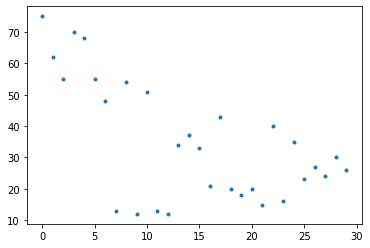

In [11]:
plt.plot(sorted_overall, sorted_clusters,'.')
plt.show()


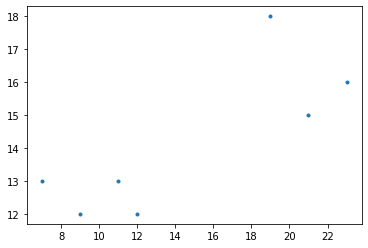

In [12]:
clusterings_under_20 = [(index, cluster_amount) for index, cluster_amount in enumerate(sorted_clusters) if cluster_amount < 20 ]
indexes_u20, cluster_amount_u20 = zip(*clusterings_under_20)

plt.plot(indexes_u20, cluster_amount_u20,'.')
plt.show()
